In [1]:
from tf_chpvk_pv.dataset import *
import matplotlib.pyplot as plt
import pandas as pd

df = create_dataset()

train_df, test_df = train_test_split_()

2025-03-28 13:40:46.915 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV


2025-03-28 13:40:47.754 | INFO     | tf_chpvk_pv.dataset:create_dataset:39 - Processing dataset...
2025-03-28 13:40:48.846 | SUCCESS  | tf_chpvk_pv.dataset:create_dataset:164 - Processing dataset complete.
2025-03-28 13:40:49.096 | INFO     | tf_chpvk_pv.dataset:train_test_split_:178 - Creating train and test dataset...
2025-03-28 13:40:49.111 | SUCCESS  | tf_chpvk_pv.dataset:train_test_split_:212 - Creating train and test dataset complete.


In [2]:
from tf_chpvk_pv.modeling.train import *

train_df, test_df, tolerance_factor_dict = evaluate_t_sisso('')

In [3]:
df = pd.concat([train_df, test_df])
df['type'] = 'Halogen'
df.loc[df.rX == 184.4, 'type'] = 'Chalcogen'
df.loc[df.rX == 198.14, 'type'] = 'Chalcogen'
df.loc[df['exp_label'] == 1, 'stab'] = 'Stable PVK'
df.loc[df['exp_label'] == 0, 'stab'] = 'Unstable PVK'

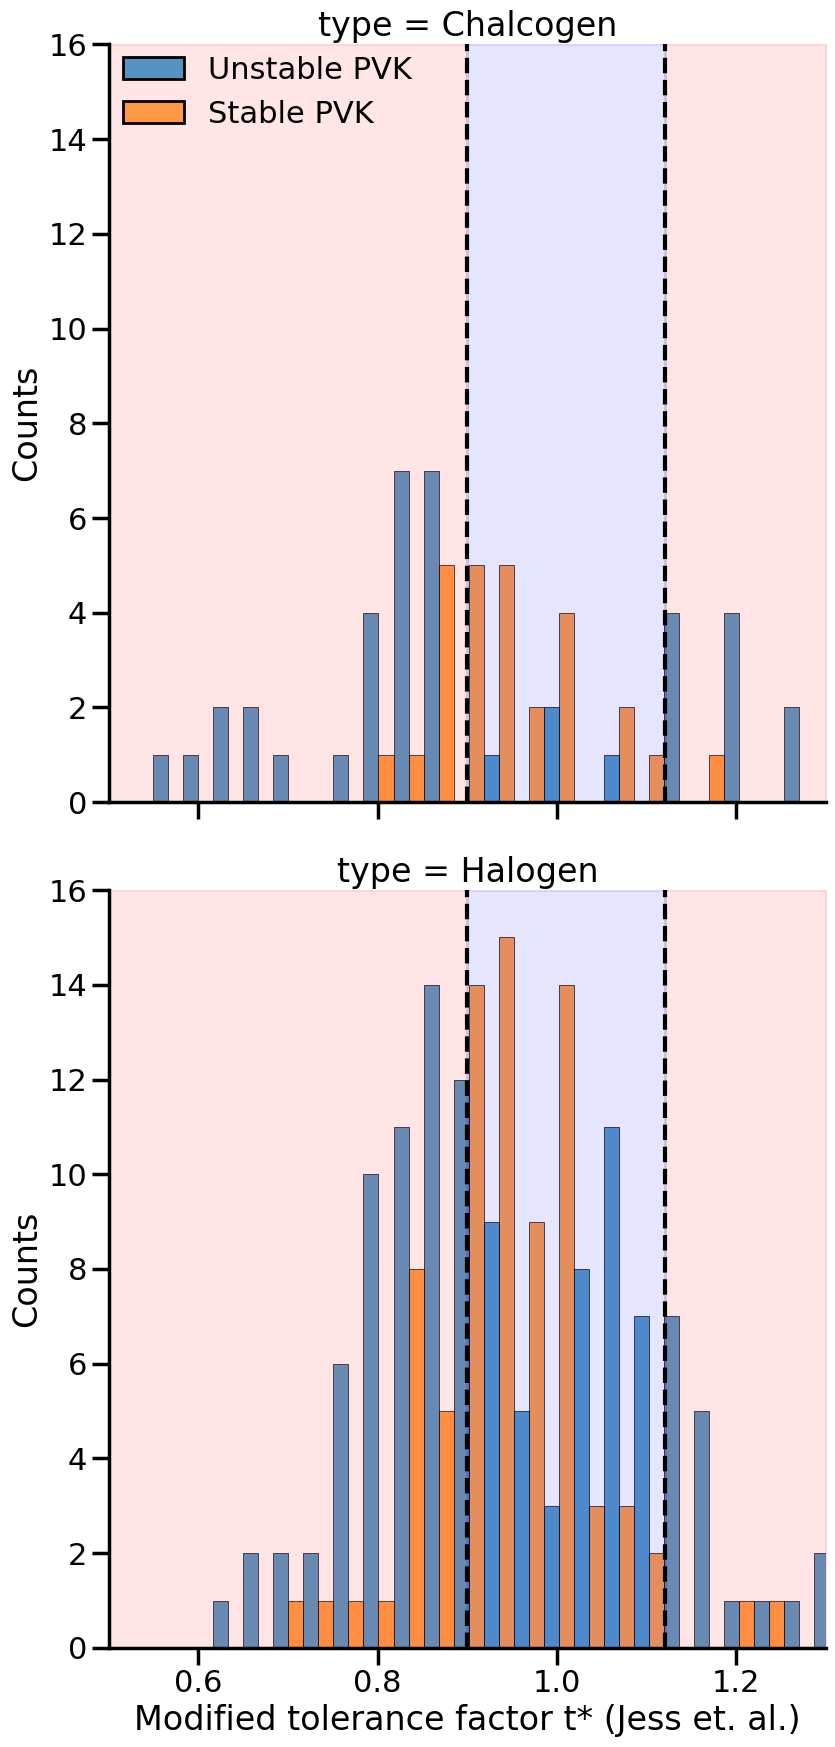

In [4]:
import seaborn as sns
from tf_chpvk_pv.config import FIGURES_DIR

sns.set_context("poster")
fg = sns.displot(data=df, x='t_jess', hue='stab',
                row='type', bins=50, 
                stat='count', height=9,
                multiple='dodge')



#sns.histplot(data=df, x='t_jess', hue=['exp_label', 'type'], bins=50, stat='percent', common_norm=False, multiple='dodge')
#sns.histplot(data=df[df['exp_label'] == 0], x='t_jess', hue='type', bins=50, stat='percent', common_norm=False, multiple='dodge')

xlims = [0.5, 1.3]
ylims = [0, 16]
th = [0.9, 1.12]

fg.refline(x=th[0], color='k', linestyle='--')
fg.refline(x=th[1], color='k', linestyle='--')

for ax in fg.axes:
    ax[0].fill_between([xlims[0],th[0]], ylims[0], ylims[1], color='red', alpha=0.1)
    ax[0].fill_between([th[0], th[1]], ylims[0], ylims[1], color='blue', alpha=0.1)
    ax[0].fill_between([th[1], xlims[1]], ylims[0], ylims[1], color='red', alpha=0.1)

plt.xlim(xlims)
plt.ylim(ylims)
sns.move_legend(fg, "upper left", title=None, frameon=False,
                bbox_to_anchor=(0.1, 0.97))

fg.set_axis_labels(x_var='Modified tolerance factor t* (Jess et. al.)', y_var='Counts')
fg.savefig(FIGURES_DIR / 'hist_dataset.png')